In [ ]:
!pip install numpy pandas matplotlib scipy seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/housing.csv')


#  Limpieza y Preparación

In [ ]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (20640, 10)
Nombre columnas: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [ ]:
columnas = df.columns
lista_columnas=list(columnas)
for i in lista_columnas:
    print (i)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


1. **`longitude` (longitud)**:
   - La longitud geográfica del centro de una cuadra de viviendas. Es una medida que indica la posición este-oeste en el globo terráqueo.

2. **`latitude` (latitud)**:
   - La latitud geográfica del centro de una cuadra de viviendas. Es una medida que indica la posición norte-sur en el globo terráqueo.

3. **`housing_median_age` (edad mediana de las viviendas)**:
   - La edad mediana de las casas en la cuadra. Esta columna indica cuántos años tiene la mitad de las casas (por edad) en una cuadra específica.

4. **`total_rooms` (total de habitaciones)**:
   - El número total de habitaciones (no solo dormitorios) en todas las casas en una cuadra.

5. **`total_bedrooms` (total de dormitorios)**:
   - El número total de dormitorios en todas las casas en una cuadra.

6. **`population` (población)**:
   - El número total de personas que viven en una cuadra.

7. **`households` (hogares)**:
   - El número total de hogares (unidades familiares) en una cuadra. Un hogar puede incluir una familia, un grupo de personas o una sola persona que vive sola.

8. **`median_income` (ingreso mediano)**:
   - El ingreso mediano de las familias en una cuadra. Esta columna generalmente se mide en decenas de miles de dólares anuales.

9. **`median_house_value` (valor mediano de las casas)**:
   - El valor mediano de las casas en una cuadra. Esta es una medida de valor central y se usa para eliminar el efecto de valores extremos en los precios de las casas.

10. **`ocean_proximity` (proximidad al océano)**:
    - Una categoría que indica la proximidad de la cuadra al océano. Los valores pueden ser como "NEAR BAY" (cerca de la bahía), "NEAR OCEAN" (cerca del océano), "INLAND" (tierra adentro), "ISLAND" (isla), etc.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
min = df.min(numeric_only=True)
max = df.max(numeric_only=True)

variables = min.index
rangos = pd.DataFrame({
    'Mínimo': min.values,
    'Máximo': max.values,
    'Rango': max - min
})
rangos

Mínimo       Máximo        Rango
longitude            -124.3500    -114.3100      10.0400
latitude               32.5400      41.9500       9.4100
housing_median_age      1.0000      52.0000      51.0000
total_rooms             2.0000   39320.0000   39318.0000
total_bedrooms          1.0000    6445.0000    6444.0000
population              3.0000   35682.0000   35679.0000
households              1.0000    6082.0000    6081.0000
median_income           0.4999      15.0001      14.5002
median_house_value  14999.0000  500001.0000  485002.0000

**Con el fin de conocer todas las categorias de la columna de proximidad al oceano**

In [ ]:
proximidad= list(df["ocean_proximity"])
valores_proximidad = []
for i in proximidad:
    if i not in valores_proximidad:
        valores_proximidad.append(i)
print(valores_proximidad)

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']


**La "ubicación" ISLAND es el menos frecuente, por lo mismo se quiere conocerlo**

In [ ]:
island_ocean_proximity = df[df['ocean_proximity'] == 'ISLAND']
island_ocean_proximity

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8314    -118.32     33.35                27.0       1675.0           521.0   
8315    -118.33     33.34                52.0       2359.0           591.0   
8316    -118.32     33.33                52.0       2127.0           512.0   
8317    -118.32     33.34                52.0        996.0           264.0   
8318    -118.48     33.43                29.0        716.0           214.0   

      population  households  median_income  median_house_value  \
8314       744.0       331.0         2.1579            450000.0   
8315      1100.0       431.0         2.8333            414700.0   
8316       733.0       288.0         3.3906            300000.0   
8317       341.0       160.0         2.7361            450000.0   
8318       422.0       173.0         2.6042            287500.0   

     ocean_proximity  
8314          ISLAND  
8315          ISLAND  
8316          ISLAND  
8317          ISLAND  
8318          ISLAND

**Se reconocen las columnas numericas, se crea una lista con ellas con el fin de que tegan el tipo de dato adecuado**

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in ['latitude', 'longitude']]
numeric_columns

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
for i in numeric_columns:
    df[i] =df[i].astype("int64")
df.dtypes

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

**Conocer valores nan**

In [ ]:
nan_counts = df.isnull().sum()
print(nan_counts)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


**EN PRIMERA MEDIDA NO NOS INTERESA LATITUd Y LONGITUD PARA LOS PRIMEROS PASOS DEL ANÁLISIS EXPLORATORIO, ADEMÁS SE PRETENDE QUE LAS COLUMNAS NUMERICAS SEAN DE TIPO DE DATO ENTERO (INT 64) PERO EN LA COLUMNA DE "Total_bedroom" HAY VALORES "NaN".**

In [ ]:
df.dropna(inplace=True)

In [ ]:
print(nan_counts)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
for i in numeric_columns:
    df[i] =df[i].astype("int64")
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income           int64
median_house_value      int64
ocean_proximity        object
dtype: object

**LO ANTERIOR SE HIZO SIN EL RECONOCIMIENTO DE VALORES ATIPICOS, A CONTINUACIÓN SE RECONOCERAN Y SE COMPARARÁ CON LOS RESULTADOS ANTERIORES**

In [ ]:
df.describe().round(2)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   20433.00  20433.00            20433.00     20433.00        20433.00   
mean     -119.57     35.63               28.63      2636.50          537.87   
std         2.00      2.14               12.59      2185.27          421.39   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.80     33.93               18.00      1450.00          296.00   
50%      -118.49     34.26               29.00      2127.00          435.00   
75%      -118.01     37.72               37.00      3143.00          647.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  
count    20433.00    20433.00       20433.00            20433.00  
mean      1424.95      499.43           3.39           206864.41  
std       1133.21      382.30           1.93           115435.67  
min          3.00        1.00           0.00            14999.00  
25%        787.00      280.00           2.00           119500.00  
50%       1166.00      409.00           3.00           179700.00  
75%       1722.00      604.00           4.00           264700.00  
max      35682.00     6082.00          15.00           500001.00

**Nótese que la desviación estandar en las columnas: total_rooms, population y median_house_value son las mayores**

# Se Reconoceran valores atipicos por columna

Text(0.5, 1.0, 'Box plot')

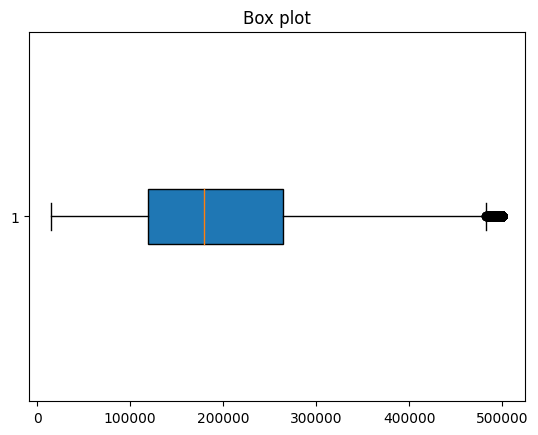

In [ ]:
plt.boxplot(df["median_house_value"], vert=False, patch_artist=True)
plt.title("Box plot")

# Creando Funciónes para calcular rango intercuartil, limites y detectar outliers

In [ ]:
def rangointercuartil(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    return IQR

def limites(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    limite_inferior = Q1 - (1.5*IQR)
    limite_superior = Q3 + (1.5*IQR)
    return limite_inferior, limite_superior

def detectar_outliers(df, columna):
    # Obtener los límites inferior y superior
    limite_inferior, limite_superior = limites(df[columna])

    # Encontrar los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    return outliers



In [ ]:
cuantiles = df.quantile(q=[0.75, 0.50, 0.25], numeric_only=True)
cuantiles = cuantiles.transpose().rename_axis('Variable').reset_index()
cuantiles

Variable       0.75        0.5       0.25
0           longitude    -118.01    -118.49    -121.80
1            latitude      37.72      34.26      33.93
2  housing_median_age      37.00      29.00      18.00
3         total_rooms    3143.00    2127.00    1450.00
4      total_bedrooms     647.00     435.00     296.00
5          population    1722.00    1166.00     787.00
6          households     604.00     409.00     280.00
7       median_income       4.00       3.00       2.00
8  median_house_value  264700.00  179700.00  119500.00

In [ ]:
cuantiles = df.quantile(q=[0.75, 0.50, 0.25], numeric_only=True)
cuantiles = cuantiles.transpose().rename_axis('Variable').reset_index()
cuantiles['IQR'] = cuantiles[0.75] - cuantiles[0.25]

# Cálculo del limite inferior y superior
cuantiles['Limite inferior'] = cuantiles[0.25] - 1.5*cuantiles['IQR']
cuantiles['Limite superior'] = cuantiles[0.75] + 1.5*cuantiles['IQR']

cuantiles

Variable       0.75        0.5       0.25        IQR  \
0           longitude    -118.01    -118.49    -121.80       3.79   
1            latitude      37.72      34.26      33.93       3.79   
2  housing_median_age      37.00      29.00      18.00      19.00   
3         total_rooms    3143.00    2127.00    1450.00    1693.00   
4      total_bedrooms     647.00     435.00     296.00     351.00   
5          population    1722.00    1166.00     787.00     935.00   
6          households     604.00     409.00     280.00     324.00   
7       median_income       4.00       3.00       2.00       2.00   
8  median_house_value  264700.00  179700.00  119500.00  145200.00   

   Limite inferior  Limite superior  
0         -127.485         -112.325  
1           28.245           43.405  
2          -10.500           65.500  
3        -1089.500         5682.500  
4         -230.500         1173.500  
5         -615.500         3124.500  
6         -206.000         1090.000  
7           -1.000            7.000  
8       -98300.000       482500.000

**Outliers para median house value**

In [ ]:
rangointercuartil(df["median_house_value"])

145200.0

In [ ]:
limites(df["median_house_value"])

(-98300.0, 482500.0)

In [ ]:
detectar_outliers(df, "median_house_value")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                  52          249              78   
140      -122.18     37.81                  30          292              38   
459      -122.25     37.87                  52          609             236   
489      -122.25     37.86                  48         2153             517   
493      -122.24     37.86                  52         1668             225   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14                  35         1503             263   
20426    -118.69     34.18                  11         1177             138   
20427    -118.80     34.19                   4        15572            2222   
20436    -118.69     34.21                  10         3663             409   
20443    -118.85     34.27                  50          187              33   

       population  households  median_income  median_house_value  \
89            396          85              1              500001   
140           126          52              6              483300   
459          1349         250              1              500001   
489          1656         459              3              489600   
493           517         214              7              500001   
...           ...         ...            ...                 ...   
20422         576         216              5              500001   
20426         415         119             10              500001   
20427        5495        2152              8              500001   
20436        1179         371             12              500001   
20443         130          35              3              500001   

      ocean_proximity  
89           NEAR BAY  
140          NEAR BAY  
459          NEAR BAY  
489          NEAR BAY  
493          NEAR BAY  
...               ...  
20422       <1H OCEAN  
20426       <1H OCEAN  
20427       <1H OCEAN  
20436       <1H OCEAN  
20443       <1H OCEAN  

[1064 rows x 10 columns]

In [ ]:
limites(df["total_rooms"])

(-1089.5, 5682.5)

In [ ]:
detectar_outliers(df, "total_rooms")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                  21         7099            1106   
101      -122.25     37.81                  28         5806            1603   
104      -122.26     37.81                  34         5871            1914   
185      -122.23     37.79                  43         5963            1344   
283      -122.16     37.79                  22        12842            2048   
...          ...       ...                 ...          ...             ...   
20543    -121.74     38.55                  33         6861            1820   
20544    -121.76     38.55                  23         8800            1857   
20563    -121.75     38.67                   9        12139            2640   
20567    -121.79     38.66                  15         6809            1052   
20629    -121.39     39.12                  28        10035            1856   

       population  households  median_income  median_house_value  \
1            2401        1138              8              358500   
101          2563        1497              3              273400   
104          2689        1789              2              335700   
185          4367        1231              2              112800   
283          4985        1967              5              371000   
...           ...         ...            ...                 ...   
20543        3717        1767              1              182600   
20544        6330        1832              2              219400   
20563        6837        2358              3              132500   
20567        3060        1060              5              165000   
20629        6912        1818              2              108300   

      ocean_proximity  
1            NEAR BAY  
101          NEAR BAY  
104          NEAR BAY  
185          NEAR BAY  
283          NEAR BAY  
...               ...  
20543          INLAND  
20544          INLAND  
20563          INLAND  
20567          INLAND  
20629          INLAND  

[1290 rows x 10 columns]

In [ ]:
detectar_outliers(df, "households")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                  21         7099            1106   
95       -122.26     37.80                  36         5329            2477   
96       -122.26     37.82                  31         4596            1331   
98       -122.26     37.82                  22         3682            1270   
100      -122.25     37.81                  29         4656            1414   
...          ...       ...                 ...          ...             ...   
20541    -121.70     38.54                  13         6819            1158   
20543    -121.74     38.55                  33         6861            1820   
20544    -121.76     38.55                  23         8800            1857   
20563    -121.75     38.67                   9        12139            2640   
20629    -121.39     39.12                  28        10035            1856   

       population  households  median_income  median_house_value  \
1            2401        1138              8              358500   
95           3469        2323              2              130000   
96           2048        1180              2              183800   
98           2024        1250              1              170000   
100          2304        1250              2              257800   
...           ...         ...            ...                 ...   
20541        2828        1115              4              226500   
20543        3717        1767              1              182600   
20544        6330        1832              2              219400   
20563        6837        2358              3              132500   
20629        6912        1818              2              108300   

      ocean_proximity  
1            NEAR BAY  
95           NEAR BAY  
96           NEAR BAY  
98           NEAR BAY  
100          NEAR BAY  
...               ...  
20541          INLAND  
20543          INLAND  
20544          INLAND  
20563          INLAND  
20629          INLAND  

[1210 rows x 10 columns]

# Analisis Exploratorio
Se pretende trabajar con estadisticas de resumen de los datos (descriptivas) con el fin de reconocer el comportamiento de los datos e identificar de que forma los outliers afectan a este comportamiento.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  int64  
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  int64  
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(2), int64(7), object(1)
memory usage: 1.7+ MB


# Se vera primero la relación entra las distintas categorias
Esto teniendo en cuenta que nuestra variable a predecir o de interes, es el precio de las viviendas

Text(0, 0.5, 'Valor Medio de la Casa')

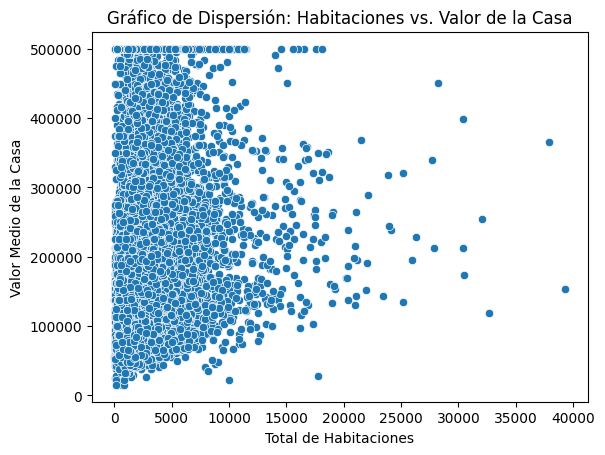

In [ ]:
sns.scatterplot(data=df, x='total_rooms', y='median_house_value', palette='deep')
plt.title('Gráfico de Dispersión: Habitaciones vs. Valor de la Casa')
plt.xlabel('Total de Habitaciones')
plt.ylabel('Valor Medio de la Casa')


Text(37.722222222222214, 0.5, 'Valor Medio de la Casa')

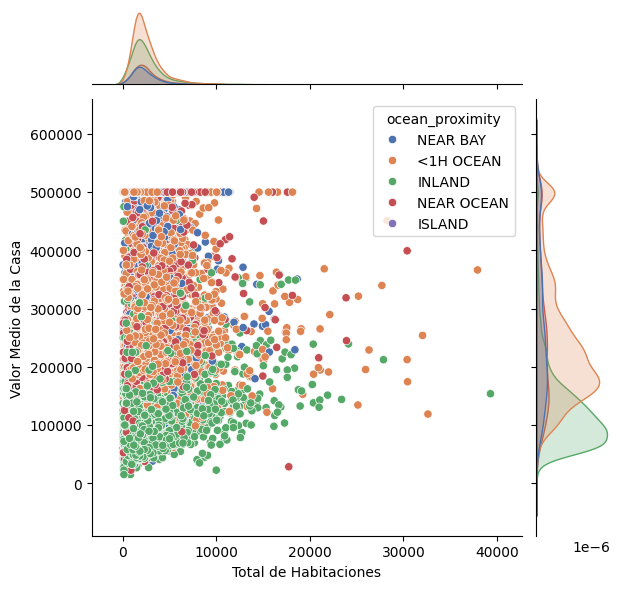

In [ ]:
sns.jointplot(data=df, x='total_rooms', y='median_house_value', hue='ocean_proximity', kind='scatter', palette='deep')
plt.xlabel('Total de Habitaciones')
plt.ylabel('Valor Medio de la Casa')


<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

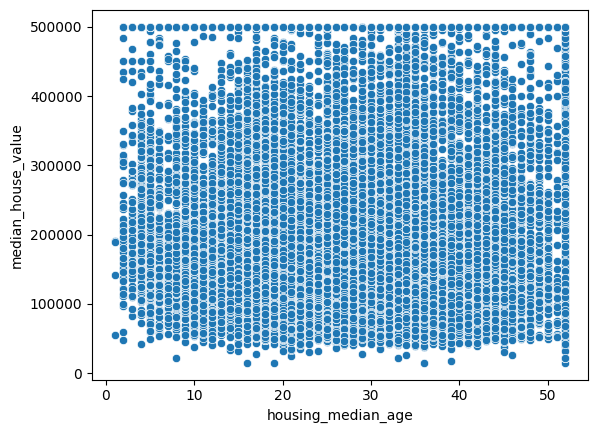

In [ ]:
sns.scatterplot(data=df, x='housing_median_age', y='median_house_value')

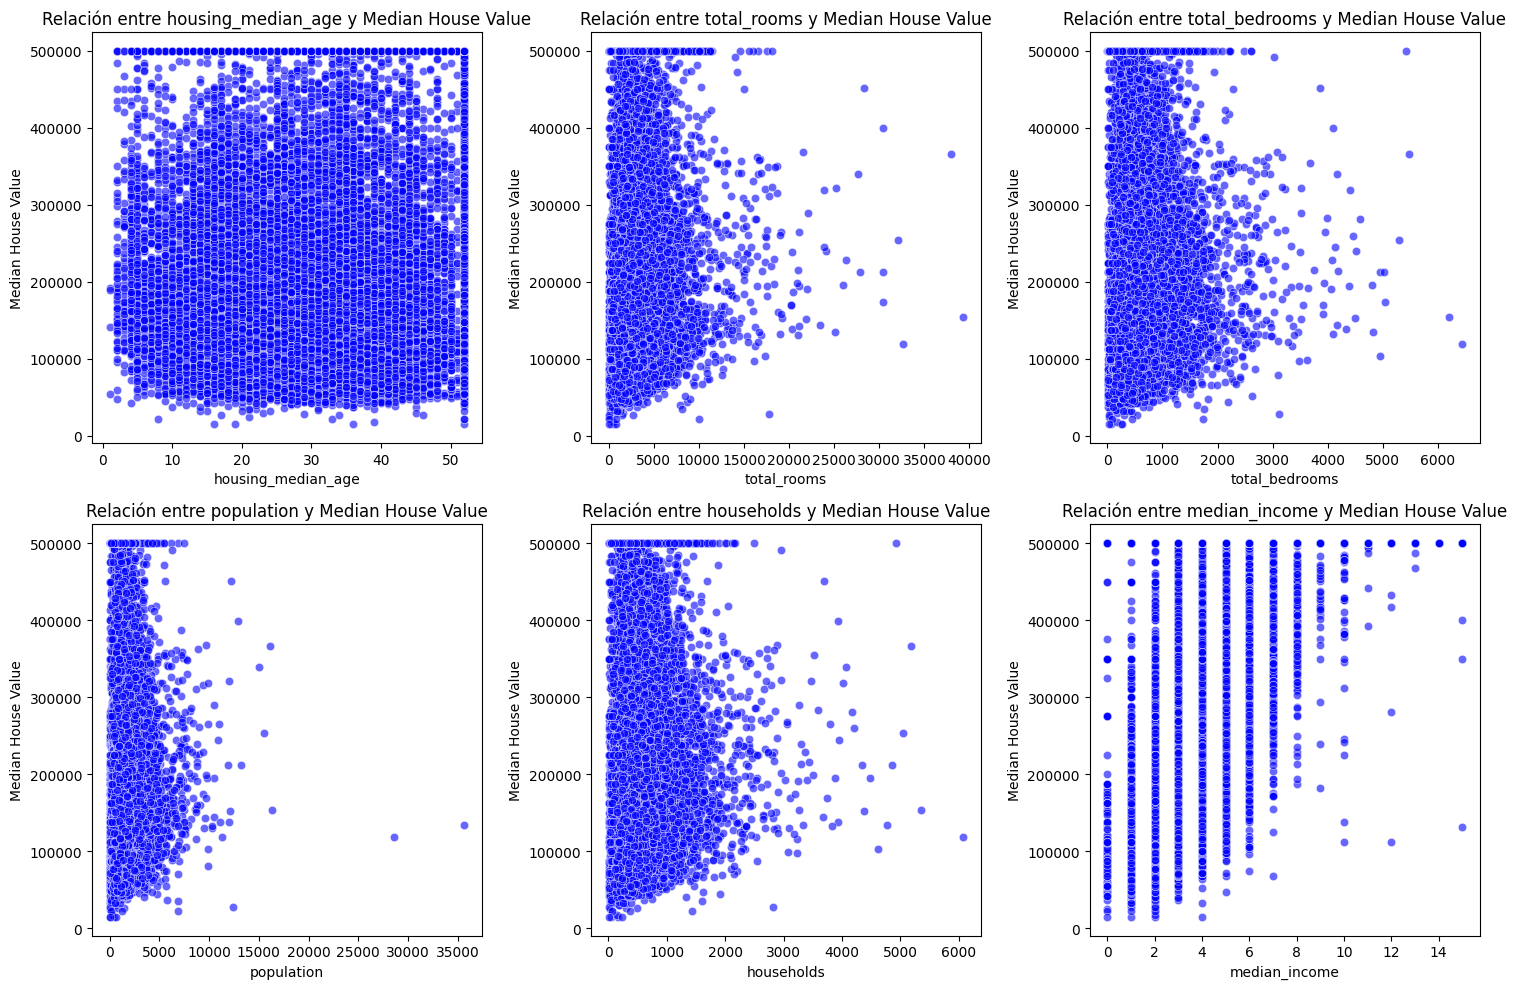

In [ ]:
variables_numericas = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                        'population', 'households', 'median_income']

# Crear un gráfico de dispersión para cada variable numérica en relación con 'median_house_value'
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_numericas, start=1):
    plt.subplot(2, 3, i)  # Crear un gráfico en una cuadrícula de 2 filas y 3 columnas
    sns.scatterplot(data=df, x=var, y='median_house_value', alpha=0.6, color='blue')

    # Títulos y etiquetas
    plt.title(f'Relación entre {var} y Median House Value')
    plt.xlabel(var)
    plt.ylabel('Median House Value')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

Text(0.5, 1.0, 'Histograma del Valor Mediano de las Casas')

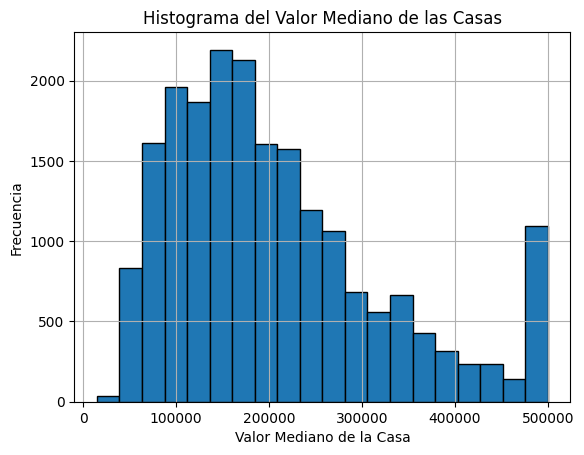

In [ ]:
df.hist(column="median_house_value", bins=20, edgecolor='black')

# Añadir etiquetas y título
plt.xlabel("Valor Mediano de la Casa")
plt.ylabel("Frecuencia")
plt.title("Histograma del Valor Mediano de las Casas")

<Axes: xlabel='total_rooms'>

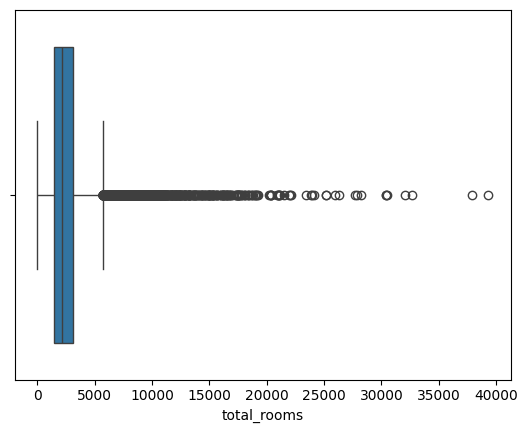

In [ ]:
sns.boxplot(x=df['total_rooms'])


Text(-12.430555555555555, 0.5, 'Frecuencia')

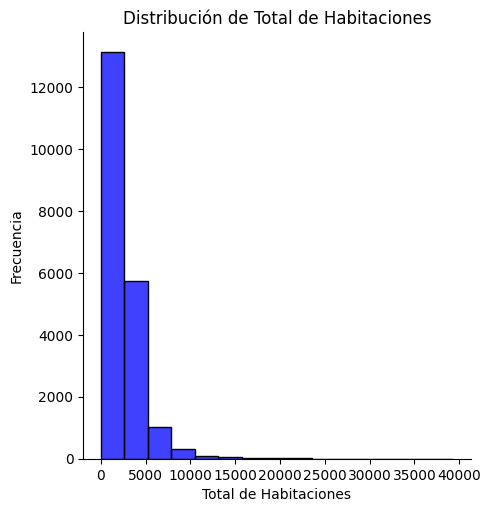

In [ ]:
sns.displot(df, x='total_rooms', kde=False, bins=15, color='blue', rug=False)
plt.title('Distribución de Total de Habitaciones')
plt.xlabel('Total de Habitaciones')
plt.ylabel('Frecuencia')

In [ ]:
habitaciones_menores_a_5000 = df[df['total_rooms'] < 5000]
habitaciones_menores_a_5000

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880             129   
2        -122.24     37.85                  52         1467             190   
3        -122.25     37.85                  52         1274             235   
4        -122.25     37.85                  52         1627             280   
5        -122.25     37.85                  52          919             213   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665             374   
20636    -121.21     39.49                  18          697             150   
20637    -121.22     39.43                  17         2254             485   
20638    -121.32     39.43                  18         1860             409   
20639    -121.24     39.37                  16         2785             616   

       population  households  median_income  median_house_value  \
0             322         126              8              452600   
2             496         177              7              352100   
3             558         219              5              341300   
4             565         259              3              342200   
5             413         193              4              269700   
...           ...         ...            ...                 ...   
20635         845         330              1               78100   
20636         356         114              2               77100   
20637        1007         433              1               92300   
20638         741         349              1               84700   
20639        1387         530              2               89400   

      ocean_proximity  
0            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
5            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[18693 rows x 10 columns]

Más del 90% por ciento tiene 5 mil o menos habitaciones

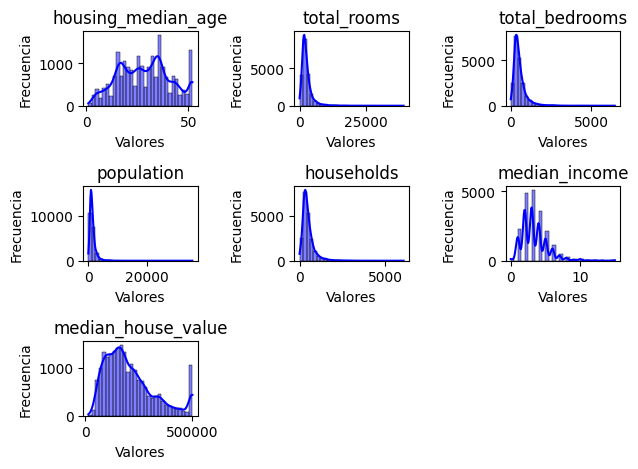

In [ ]:
for i, column in enumerate(df.select_dtypes(include=['int64'])):
    plt.subplot(3, 3, i + 1)  # Ajustar el número de filas y columnas según sea necesario
    sns.histplot(df[column], bins=30, kde=True, color='blue', ax=plt.gca())  # Histograma con KDE
    plt.title(column)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')

plt.tight_layout()


**Las variables "total_bedrooms", "population" y "house_holds" tiene un comportamiento similar al que se vio anteriormente con la variable "total_rooms". Tambien estas coinciden con las variables que tienen una desviación estandar mayor, y con el comportamiento de correlacion entre estas categorias y "median_house_value". Se hará una análisis más detallado a esto ya que esto puede brindar información para tomar mejores decisiones respecto a outliers**

Text(-12.430555555555555, 0.5, 'Frecuencia')

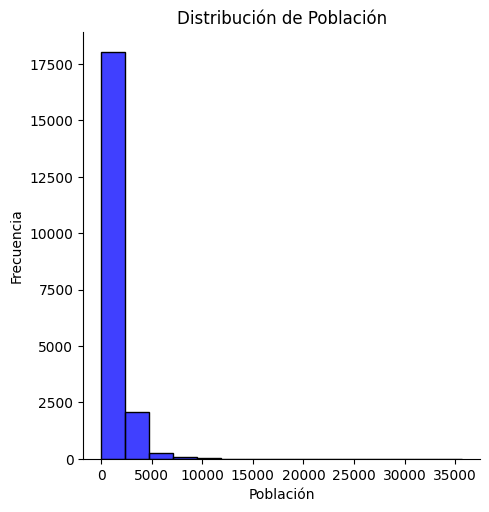

In [ ]:
sns.displot(df, x='population', kde=False, bins=15, color='blue', rug=False)
plt.title('Distribución de Población')
plt.xlabel('Población')
plt.ylabel('Frecuencia')

In [ ]:
poblacion_menores_a_5000 = df[df['population'] < 5000]
poblacion_menores_a_5000

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880             129   
1        -122.22     37.86                  21         7099            1106   
2        -122.24     37.85                  52         1467             190   
3        -122.25     37.85                  52         1274             235   
4        -122.25     37.85                  52         1627             280   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665             374   
20636    -121.21     39.49                  18          697             150   
20637    -121.22     39.43                  17         2254             485   
20638    -121.32     39.43                  18         1860             409   
20639    -121.24     39.37                  16         2785             616   

       population  households  median_income  median_house_value  \
0             322         126              8              452600   
1            2401        1138              8              358500   
2             496         177              7              352100   
3             558         219              5              341300   
4             565         259              3              342200   
...           ...         ...            ...                 ...   
20635         845         330              1               78100   
20636         356         114              2               77100   
20637        1007         433              1               92300   
20638         741         349              1               84700   
20639        1387         530              2               89400   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20130 rows x 10 columns]

Text(-12.430555555555555, 0.5, 'Frecuencia')

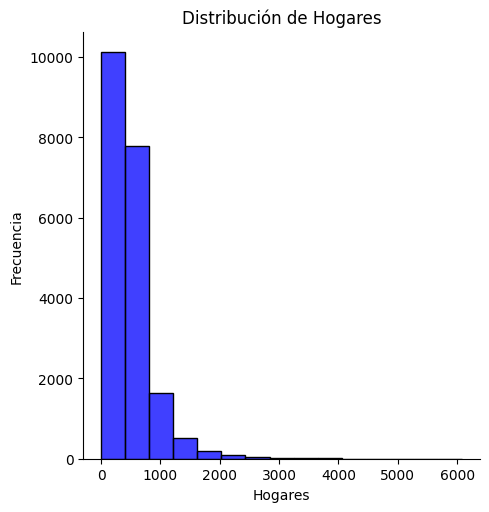

In [ ]:
sns.displot(df, x='households', kde=False, bins=15, color='blue', rug=False)
plt.title('Distribución de Hogares')
plt.xlabel('Hogares')
plt.ylabel('Frecuencia')


In [ ]:
hogares_menores_a_1000 = df[df['households'] < 1000]
hogares_menores_a_1000

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880             129   
2        -122.24     37.85                  52         1467             190   
3        -122.25     37.85                  52         1274             235   
4        -122.25     37.85                  52         1627             280   
5        -122.25     37.85                  52          919             213   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665             374   
20636    -121.21     39.49                  18          697             150   
20637    -121.22     39.43                  17         2254             485   
20638    -121.32     39.43                  18         1860             409   
20639    -121.24     39.37                  16         2785             616   

       population  households  median_income  median_house_value  \
0             322         126              8              452600   
2             496         177              7              352100   
3             558         219              5              341300   
4             565         259              3              342200   
5             413         193              4              269700   
...           ...         ...            ...                 ...   
20635         845         330              1               78100   
20636         356         114              2               77100   
20637        1007         433              1               92300   
20638         741         349              1               84700   
20639        1387         530              2               89400   

      ocean_proximity  
0            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
5            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[18902 rows x 10 columns]

Text(-12.430555555555555, 0.5, 'Frecuencia')

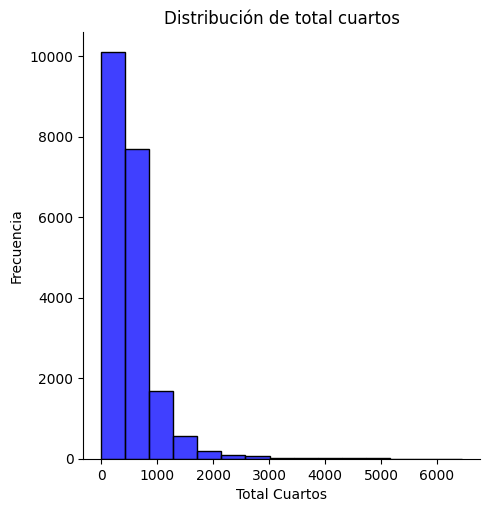

In [ ]:
sns.displot(df, x='total_bedrooms', kde=False, bins=15, color='blue', rug=False)
plt.title('Distribución de total cuartos')
plt.xlabel('Total Cuartos')
plt.ylabel('Frecuencia')


In [ ]:
cuartos_menores_a_1000 = df[df['total_bedrooms'] < 1000]
cuartos_menores_a_1000

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880             129   
2        -122.24     37.85                  52         1467             190   
3        -122.25     37.85                  52         1274             235   
4        -122.25     37.85                  52         1627             280   
5        -122.25     37.85                  52          919             213   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665             374   
20636    -121.21     39.49                  18          697             150   
20637    -121.22     39.43                  17         2254             485   
20638    -121.32     39.43                  18         1860             409   
20639    -121.24     39.37                  16         2785             616   

       population  households  median_income  median_house_value  \
0             322         126              8              452600   
2             496         177              7              352100   
3             558         219              5              341300   
4             565         259              3              342200   
5             413         193              4              269700   
...           ...         ...            ...                 ...   
20635         845         330              1               78100   
20636         356         114              2               77100   
20637        1007         433              1               92300   
20638         741         349              1               84700   
20639        1387         530              2               89400   

      ocean_proximity  
0            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
5            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[18550 rows x 10 columns]

Text(-21.180555555555557, 0.5, 'Valor medio de la casa')

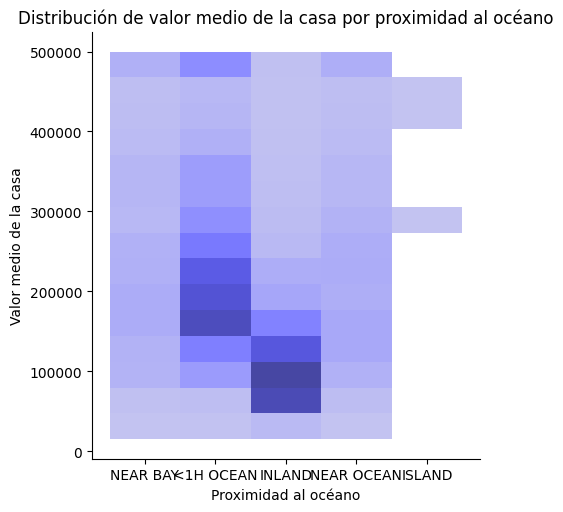

In [ ]:
sns.displot(df, x='ocean_proximity', y='median_house_value', bins=15, color='blue')  # Remove kde argument
plt.title('Distribución de valor medio de la casa por proximidad al océano')
plt.xlabel('Proximidad al océano')
plt.ylabel('Valor medio de la casa')

In [ ]:
df_menor = df[
    (df['total_rooms'] < 5000) &
    (df['population'] < 5000) &
    (df['households'] < 1000) &
    (df['total_bedrooms'] < 1000)
]

In [ ]:
df_menor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18196 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18196 non-null  float64
 1   latitude            18196 non-null  float64
 2   housing_median_age  18196 non-null  int64  
 3   total_rooms         18196 non-null  int64  
 4   total_bedrooms      18196 non-null  int64  
 5   population          18196 non-null  int64  
 6   households          18196 non-null  int64  
 7   median_income       18196 non-null  int64  
 8   median_house_value  18196 non-null  int64  
 9   ocean_proximity     18196 non-null  object 
dtypes: float64(2), int64(7), object(1)
memory usage: 1.5+ MB


In [ ]:
df.describe().round(2)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   20433.00  20433.00            20433.00     20433.00        20433.00   
mean     -119.57     35.63               28.63      2636.50          537.87   
std         2.00      2.14               12.59      2185.27          421.39   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.80     33.93               18.00      1450.00          296.00   
50%      -118.49     34.26               29.00      2127.00          435.00   
75%      -118.01     37.72               37.00      3143.00          647.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  
count    20433.00    20433.00       20433.00            20433.00  
mean      1424.95      499.43           3.39           206864.41  
std       1133.21      382.30           1.93           115435.67  
min          3.00        1.00           0.00            14999.00  
25%        787.00      280.00           2.00           119500.00  
50%       1166.00      409.00           3.00           179700.00  
75%       1722.00      604.00           4.00           264700.00  
max      35682.00     6082.00          15.00           500001.00

In [ ]:
df_menor.describe().round(2)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   18196.00  18196.00            18196.00     18196.00        18196.00   
mean     -119.60     35.67               29.90      2096.11          429.46   
std         2.00      2.15               12.29      1014.62          204.50   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.81     33.94               20.00      1375.00          282.00   
50%      -118.54     34.27               31.00      1972.00          403.00   
75%      -118.03     37.73               38.00      2734.00          559.00   
max      -114.49     41.95               52.00      4999.00          999.00   

       population  households  median_income  median_house_value  
count    18196.00    18196.00       18196.00            18196.00  
mean      1168.37      402.82           3.34           203627.59  
std        607.36      191.09           1.92           115221.51  
min          3.00        1.00           0.00            14999.00  
25%        748.00      267.00           2.00           116100.00  
50%       1079.50      380.00           3.00           176050.00  
75%       1508.00      525.00           4.00           259925.00  
max       4930.00      993.00          15.00           500001.00

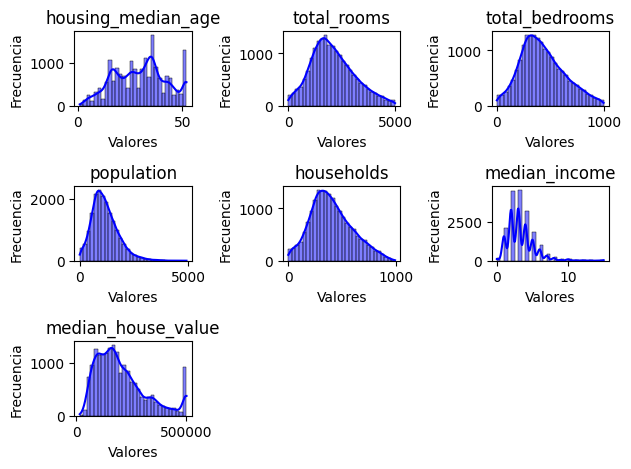

In [ ]:
for i, column in enumerate(df_menor.select_dtypes(include=['int64'])):
    plt.subplot(3, 3, i + 1)  # Ajustar el número de filas y columnas según sea necesario
    sns.histplot(df_menor[column], bins=30, kde=True, color='blue', ax=plt.gca())  # Histograma con KDE
    plt.title(column)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')

plt.tight_layout()


In [ ]:

def calcular_cuantiles(df):

    cuantiles = df.quantile(q=[0.75, 0.50, 0.25], numeric_only=True)
    cuantiles = cuantiles.transpose().rename_axis('Variable').reset_index()

    cuantiles['IQR'] = cuantiles[0.75] - cuantiles[0.25]

    cuantiles['Limite inferior'] = cuantiles[0.25] - 1.5 * cuantiles['IQR']
    cuantiles['Limite superior'] = cuantiles[0.75] + 1.5 * cuantiles['IQR']

    return cuantiles

In [ ]:
calcular_cuantiles(df_menor)

Variable       0.75        0.5       0.25        IQR  \
0           longitude    -118.03    -118.54    -121.81       3.78   
1            latitude      37.73      34.27      33.94       3.79   
2  housing_median_age      38.00      31.00      20.00      18.00   
3         total_rooms    2734.00    1972.00    1375.00    1359.00   
4      total_bedrooms     559.00     403.00     282.00     277.00   
5          population    1508.00    1079.50     748.00     760.00   
6          households     525.00     380.00     267.00     258.00   
7       median_income       4.00       3.00       2.00       2.00   
8  median_house_value  259925.00  176050.00  116100.00  143825.00   

   Limite inferior  Limite superior  
0         -127.480         -112.360  
1           28.255           43.415  
2           -7.000           65.000  
3         -663.500         4772.500  
4         -133.500          974.500  
5         -392.000         2648.000  
6         -120.000          912.000  
7           -1.000            7.000  
8       -99637.500       475662.500

In [ ]:
detectar_outliers(df_menor, "total_rooms")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
128      -122.21     37.83                  40         4991             674   
874      -122.03     37.56                  31         4981             964   
917      -121.97     37.52                  23         4925             948   
923      -121.89     37.49                   9         4909             577   
951      -121.93     37.71                  26         4822             845   
...          ...       ...                 ...          ...             ...   
20089    -120.25     38.03                  21         4924             966   
20407    -118.88     34.20                  23         4862             597   
20430    -118.84     34.21                  16         4975             949   
20506    -118.73     34.29                   8         4983             754   
20545    -121.75     38.55                  26         4802             950   

       population  households  median_income  median_house_value  \
128          1616         654              7              411500   
874          2841         924              4              220200   
917          2530         894              5              230900   
923          1981         591              9              500001   
951          2288         805              4              206000   
...           ...         ...            ...                 ...   
20089        1175         454              2              116500   
20407        1938         594              7              316000   
20430        2537         971              5              224700   
20506        2510         725              6              276500   
20545        2199         939              3              227700   

      ocean_proximity  
128          NEAR BAY  
874          NEAR BAY  
917         <1H OCEAN  
923         <1H OCEAN  
951         <1H OCEAN  
...               ...  
20089          INLAND  
20407       <1H OCEAN  
20430       <1H OCEAN  
20506       <1H OCEAN  
20545          INLAND  

[132 rows x 10 columns]

In [ ]:
detectar_outliers(df_menor, "median_house_value")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                  52          249              78   
140      -122.18     37.81                  30          292              38   
459      -122.25     37.87                  52          609             236   
489      -122.25     37.86                  48         2153             517   
493      -122.24     37.86                  52         1668             225   
...          ...       ...                 ...          ...             ...   
20389    -118.90     34.19                  26         1582             196   
20422    -118.90     34.14                  35         1503             263   
20426    -118.69     34.18                  11         1177             138   
20436    -118.69     34.21                  10         3663             409   
20443    -118.85     34.27                  50          187              33   

       population  households  median_income  median_house_value  \
89            396          85              1              500001   
140           126          52              6              483300   
459          1349         250              1              500001   
489          1656         459              3              489600   
493           517         214              7              500001   
...           ...         ...            ...                 ...   
20389         573         182             10              500001   
20422         576         216              5              500001   
20426         415         119             10              500001   
20436        1179         371             12              500001   
20443         130          35              3              500001   

      ocean_proximity  
89           NEAR BAY  
140          NEAR BAY  
459          NEAR BAY  
489          NEAR BAY  
493          NEAR BAY  
...               ...  
20389       <1H OCEAN  
20422       <1H OCEAN  
20426       <1H OCEAN  
20436       <1H OCEAN  
20443       <1H OCEAN  

[949 rows x 10 columns]

In [ ]:
detectar_outliers(df_menor, "households")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
395      -122.34     37.88                  37         3061             930   
461      -122.26     37.87                  52         2773             998   
874      -122.03     37.56                  31         4981             964   
1811     -122.32     37.92                  28         4649             977   
2756     -115.50     32.68                  18         3631             913   
...          ...       ...                 ...          ...             ...   
20191    -119.22     34.27                  11         4695             955   
20387    -118.92     34.19                  16         3631             974   
20430    -118.84     34.21                  16         4975             949   
20545    -121.75     38.55                  26         4802             950   
20604    -121.54     39.12                  17         4251             899   

       population  households  median_income  median_house_value  \
395          2556         924              1              350000   
461          1721         949              1              241700   
874          2841         924              4              220200   
1811         2606         953              3              129100   
2756         3565         924              1               88400   
...           ...         ...            ...                 ...   
20191        2065         982              3              223600   
20387        2585         923              3              130400   
20430        2537         971              5              224700   
20545        2199         939              3              227700   
20604        3265         934              2               65000   

      ocean_proximity  
395          NEAR BAY  
461          NEAR BAY  
874          NEAR BAY  
1811         NEAR BAY  
2756           INLAND  
...               ...  
20191      NEAR OCEAN  
20387       <1H OCEAN  
20430       <1H OCEAN  
20545          INLAND  
20604          INLAND  

[85 rows x 10 columns]

In [ ]:
detectar_outliers(df_menor, "population")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
204      -122.23     37.78                  44         2340             825   
330      -122.18     37.73                  42         4074             874   
460      -122.26     37.87                  52         1087             371   
536      -122.28     37.79                  30         4145             869   
874      -122.03     37.56                  31         4981             964   
...          ...       ...                 ...          ...             ...   
20307    -119.17     34.15                  18         2509             688   
20320    -119.15     34.25                  36         3511             664   
20449    -118.88     34.28                  22         3369             771   
20527    -121.79     38.54                   7         1777             513   
20604    -121.54     39.12                  17         4251             899   

       population  households  median_income  median_house_value  \
204          2813         751              1              118100   
330          2736         780              2               82400   
460          3337         350              1              175000   
536          3668         855              2              275000   
874          2841         924              4              220200   
...           ...         ...            ...                 ...   
20307        3129         677              2              146100   
20320        2965         695              4              186800   
20449        2751         710              4              182100   
20527        4479         504              1              310000   
20604        3265         934              2               65000   

      ocean_proximity  
204          NEAR BAY  
330          NEAR BAY  
460          NEAR BAY  
536          NEAR BAY  
874          NEAR BAY  
...               ...  
20307      NEAR OCEAN  
20320      NEAR OCEAN  
20449       <1H OCEAN  
20527          INLAND  
20604          INLAND  

[420 rows x 10 columns]

In [ ]:
detectar_outliers(df, "population")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
95       -122.26     37.80                  36         5329            2477   
185      -122.23     37.79                  43         5963            1344   
283      -122.16     37.79                  22        12842            2048   
460      -122.26     37.87                  52         1087             371   
485      -122.26     37.86                  35         5161            1744   
...          ...       ...                 ...          ...             ...   
20543    -121.74     38.55                  33         6861            1820   
20544    -121.76     38.55                  23         8800            1857   
20563    -121.75     38.67                   9        12139            2640   
20604    -121.54     39.12                  17         4251             899   
20629    -121.39     39.12                  28        10035            1856   

       population  households  median_income  median_house_value  \
95           3469        2323              2              130000   
185          4367        1231              2              112800   
283          4985        1967              5              371000   
460          3337         350              1              175000   
485          3276        1742              1              253600   
...           ...         ...            ...                 ...   
20543        3717        1767              1              182600   
20544        6330        1832              2              219400   
20563        6837        2358              3              132500   
20604        3265         934              2               65000   
20629        6912        1818              2              108300   

      ocean_proximity  
95           NEAR BAY  
185          NEAR BAY  
283          NEAR BAY  
460          NEAR BAY  
485          NEAR BAY  
...               ...  
20543          INLAND  
20544          INLAND  
20563          INLAND  
20604          INLAND  
20629          INLAND  

[1190 rows x 10 columns]

Se logra observar que al trabajar con este nuevo dataframe, hay menos outliers, por lo cual se puede inferir, que los outliers estan relacionados a estos datos que solo forman, en la mayoria de los casos, mennos del 10 por ciento de los datos. Se comprobará ahora dos cosas_


1.   Hay correlacion entre las variables en el nuevo dataframe?
2.   Si en el dataframe original eliminamos los outliers, este nuevo dataframe, ¿que tipo de relacion tendra con el dataframe "menor"? ¿Es cierta la hipotesis? ¿son el mismo?



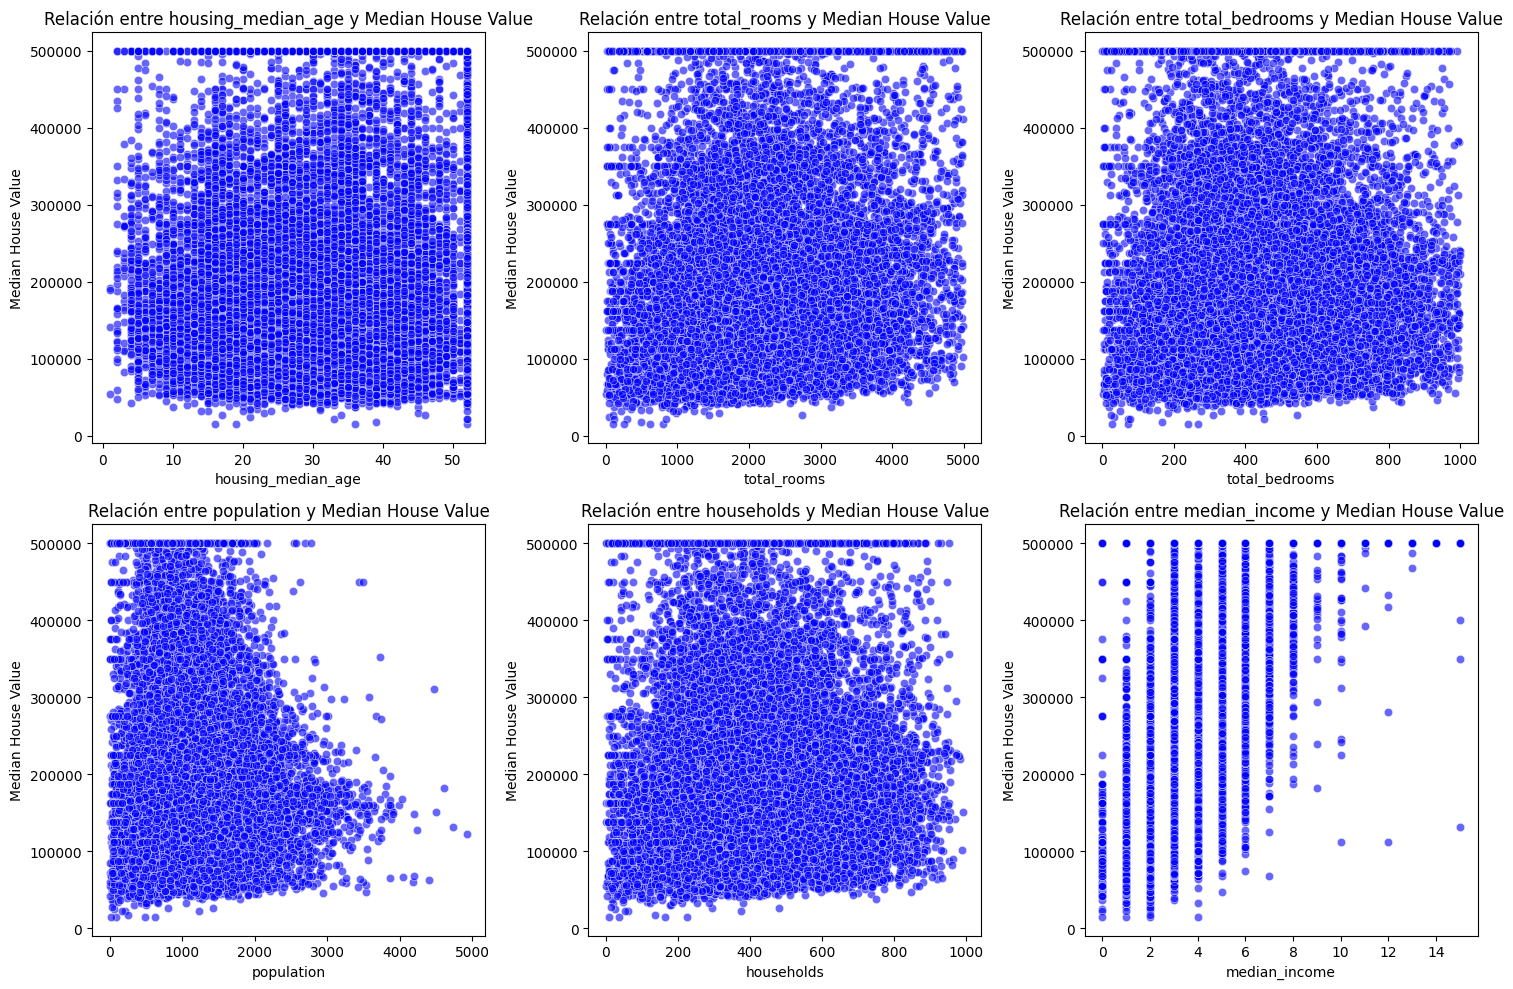

In [ ]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_numericas, start=1):
    plt.subplot(2, 3, i)  # Crear un gráfico en una cuadrícula de 2 filas y 3 columnas
    sns.scatterplot(data=df_menor, x=var, y='median_house_value', alpha=0.6, color='blue')

    # Títulos y etiquetas
    plt.title(f'Relación entre {var} y Median House Value')
    plt.xlabel(var)
    plt.ylabel('Median House Value')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

In [ ]:
outliers = detectar_outliers(df_menor, 'median_house_value')

# Almacenar los outliers en una variable
outliers_almacenados = outliers.copy()

# Eliminar los outliers de df_menor
df_menor_sin_outliers = df_menor[~df_menor.index.isin(outliers.index)]


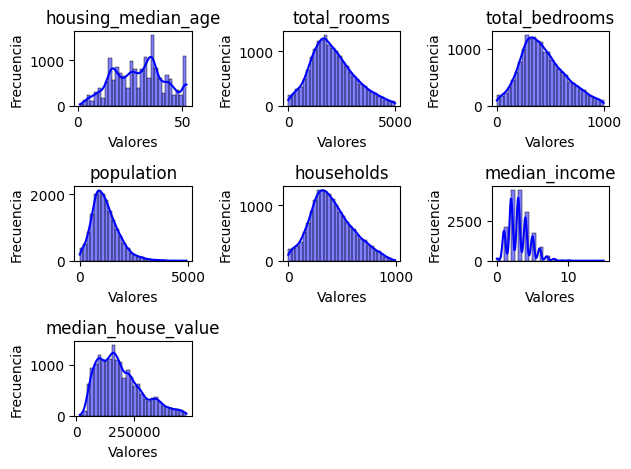

In [ ]:
for i, column in enumerate(df_menor_sin_outliers.select_dtypes(include=['int64'])):
    plt.subplot(3, 3, i + 1)  # Ajustar el número de filas y columnas según sea necesario
    sns.histplot(df_menor_sin_outliers[column], bins=30, kde=True, color='blue', ax=plt.gca())  # Histograma con KDE
    plt.title(column)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')

plt.tight_layout()


Text(0.5, 1.0, 'Histograma del Valor Mediano de las Casas')

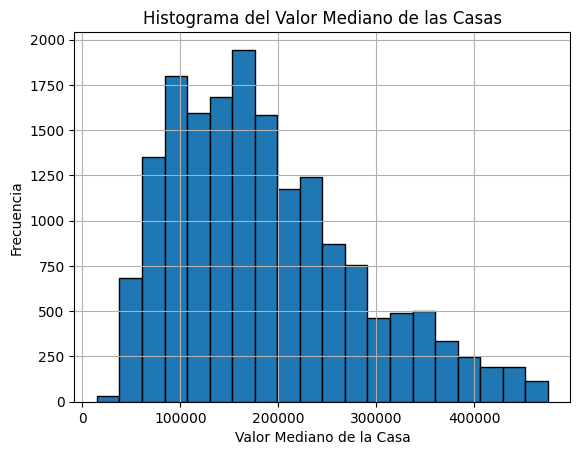

In [ ]:
df_menor_sin_outliers.hist(column="median_house_value", bins=20, edgecolor='black')

# Añadir etiquetas y título
plt.xlabel("Valor Mediano de la Casa")
plt.ylabel("Frecuencia")
plt.title("Histograma del Valor Mediano de las Casas")

In [ ]:
df_outliers = pd.DataFrame()

# Identificar outliers y añadirlos al DataFrame df_outliers
for columna in numeric_columns:
    outliers_columna = detectar_outliers(df, columna)
    df_outliers = pd.concat([df_outliers, outliers_columna], ignore_index=True)

# Crear un nuevo DataFrame que excluya los outliers
df_sin_outliers = df[~df.index.isin(df_outliers.index)]

In [ ]:
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13798 entries, 6707 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13798 non-null  float64
 1   latitude            13798 non-null  float64
 2   housing_median_age  13798 non-null  int64  
 3   total_rooms         13798 non-null  int64  
 4   total_bedrooms      13798 non-null  int64  
 5   population          13798 non-null  int64  
 6   households          13798 non-null  int64  
 7   median_income       13798 non-null  int64  
 8   median_house_value  13798 non-null  int64  
 9   ocean_proximity     13798 non-null  object 
dtypes: float64(2), int64(7), object(1)
memory usage: 1.2+ MB


Text(0, 0.5, 'Frecuencia')

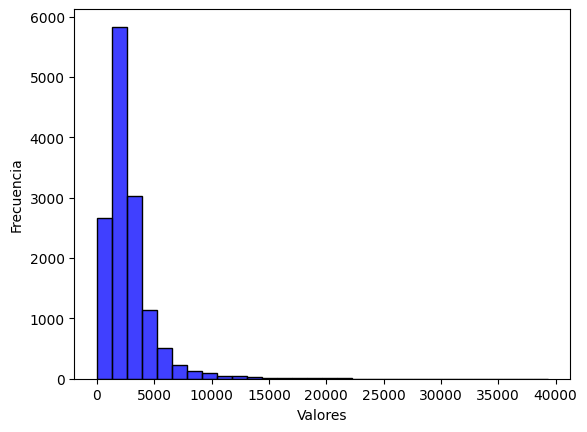

In [ ]:
sns.histplot(df_sin_outliers['total_rooms'], bins=30, kde=False, color='blue', ax=plt.gca())
plt.xlabel('Valores')
plt.ylabel('Frecuencia')



La mejor opción es tomar el dataframe "df_menor_sin_outliers"

In [ ]:
df_menor_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17247 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17247 non-null  float64
 1   latitude            17247 non-null  float64
 2   housing_median_age  17247 non-null  int64  
 3   total_rooms         17247 non-null  int64  
 4   total_bedrooms      17247 non-null  int64  
 5   population          17247 non-null  int64  
 6   households          17247 non-null  int64  
 7   median_income       17247 non-null  int64  
 8   median_house_value  17247 non-null  int64  
 9   ocean_proximity     17247 non-null  object 
dtypes: float64(2), int64(7), object(1)
memory usage: 1.4+ MB


Text(0.5, 1.0, 'Matriz de Correlación (Sin Longitude y Latitude) - Sin Outliers')

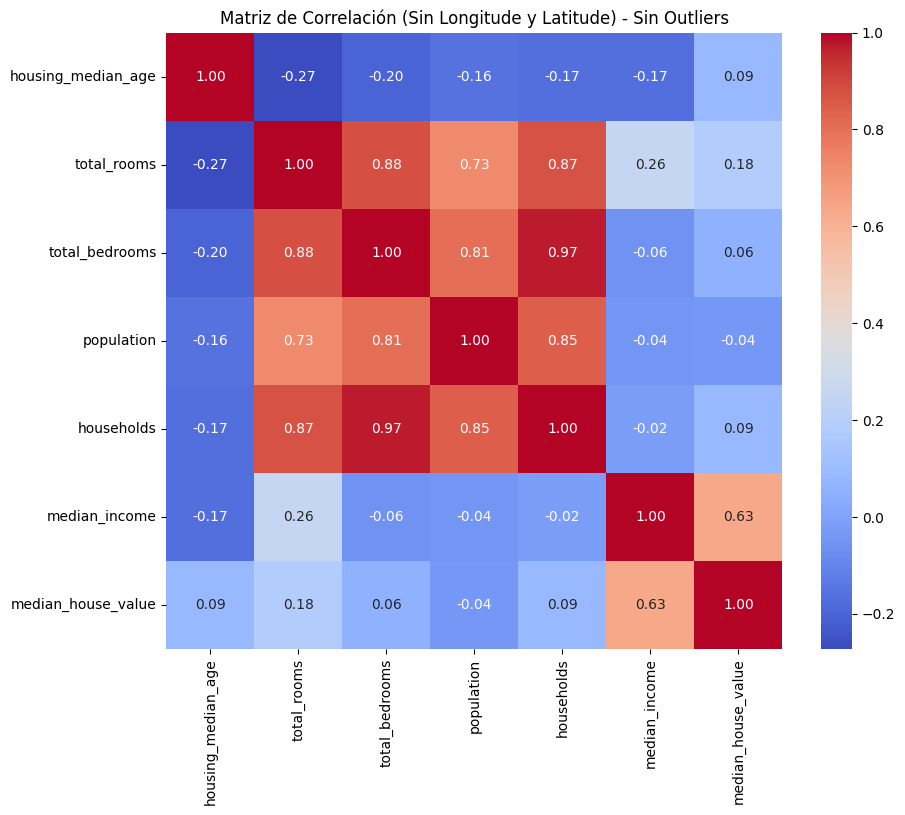

In [ ]:
df_numericas_excluidas = df_menor_sin_outliers.select_dtypes(include=['number']).drop(columns=['longitude', 'latitude'])

# 2. Calcular la matriz de correlación
matriz_correlacion = df_numericas_excluidas.corr()

# 3. Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))  # Define el tamaño de la figura
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación (Sin Longitude y Latitude) - Sin Outliers')

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns') # Changed 'columns' to axis='columns'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

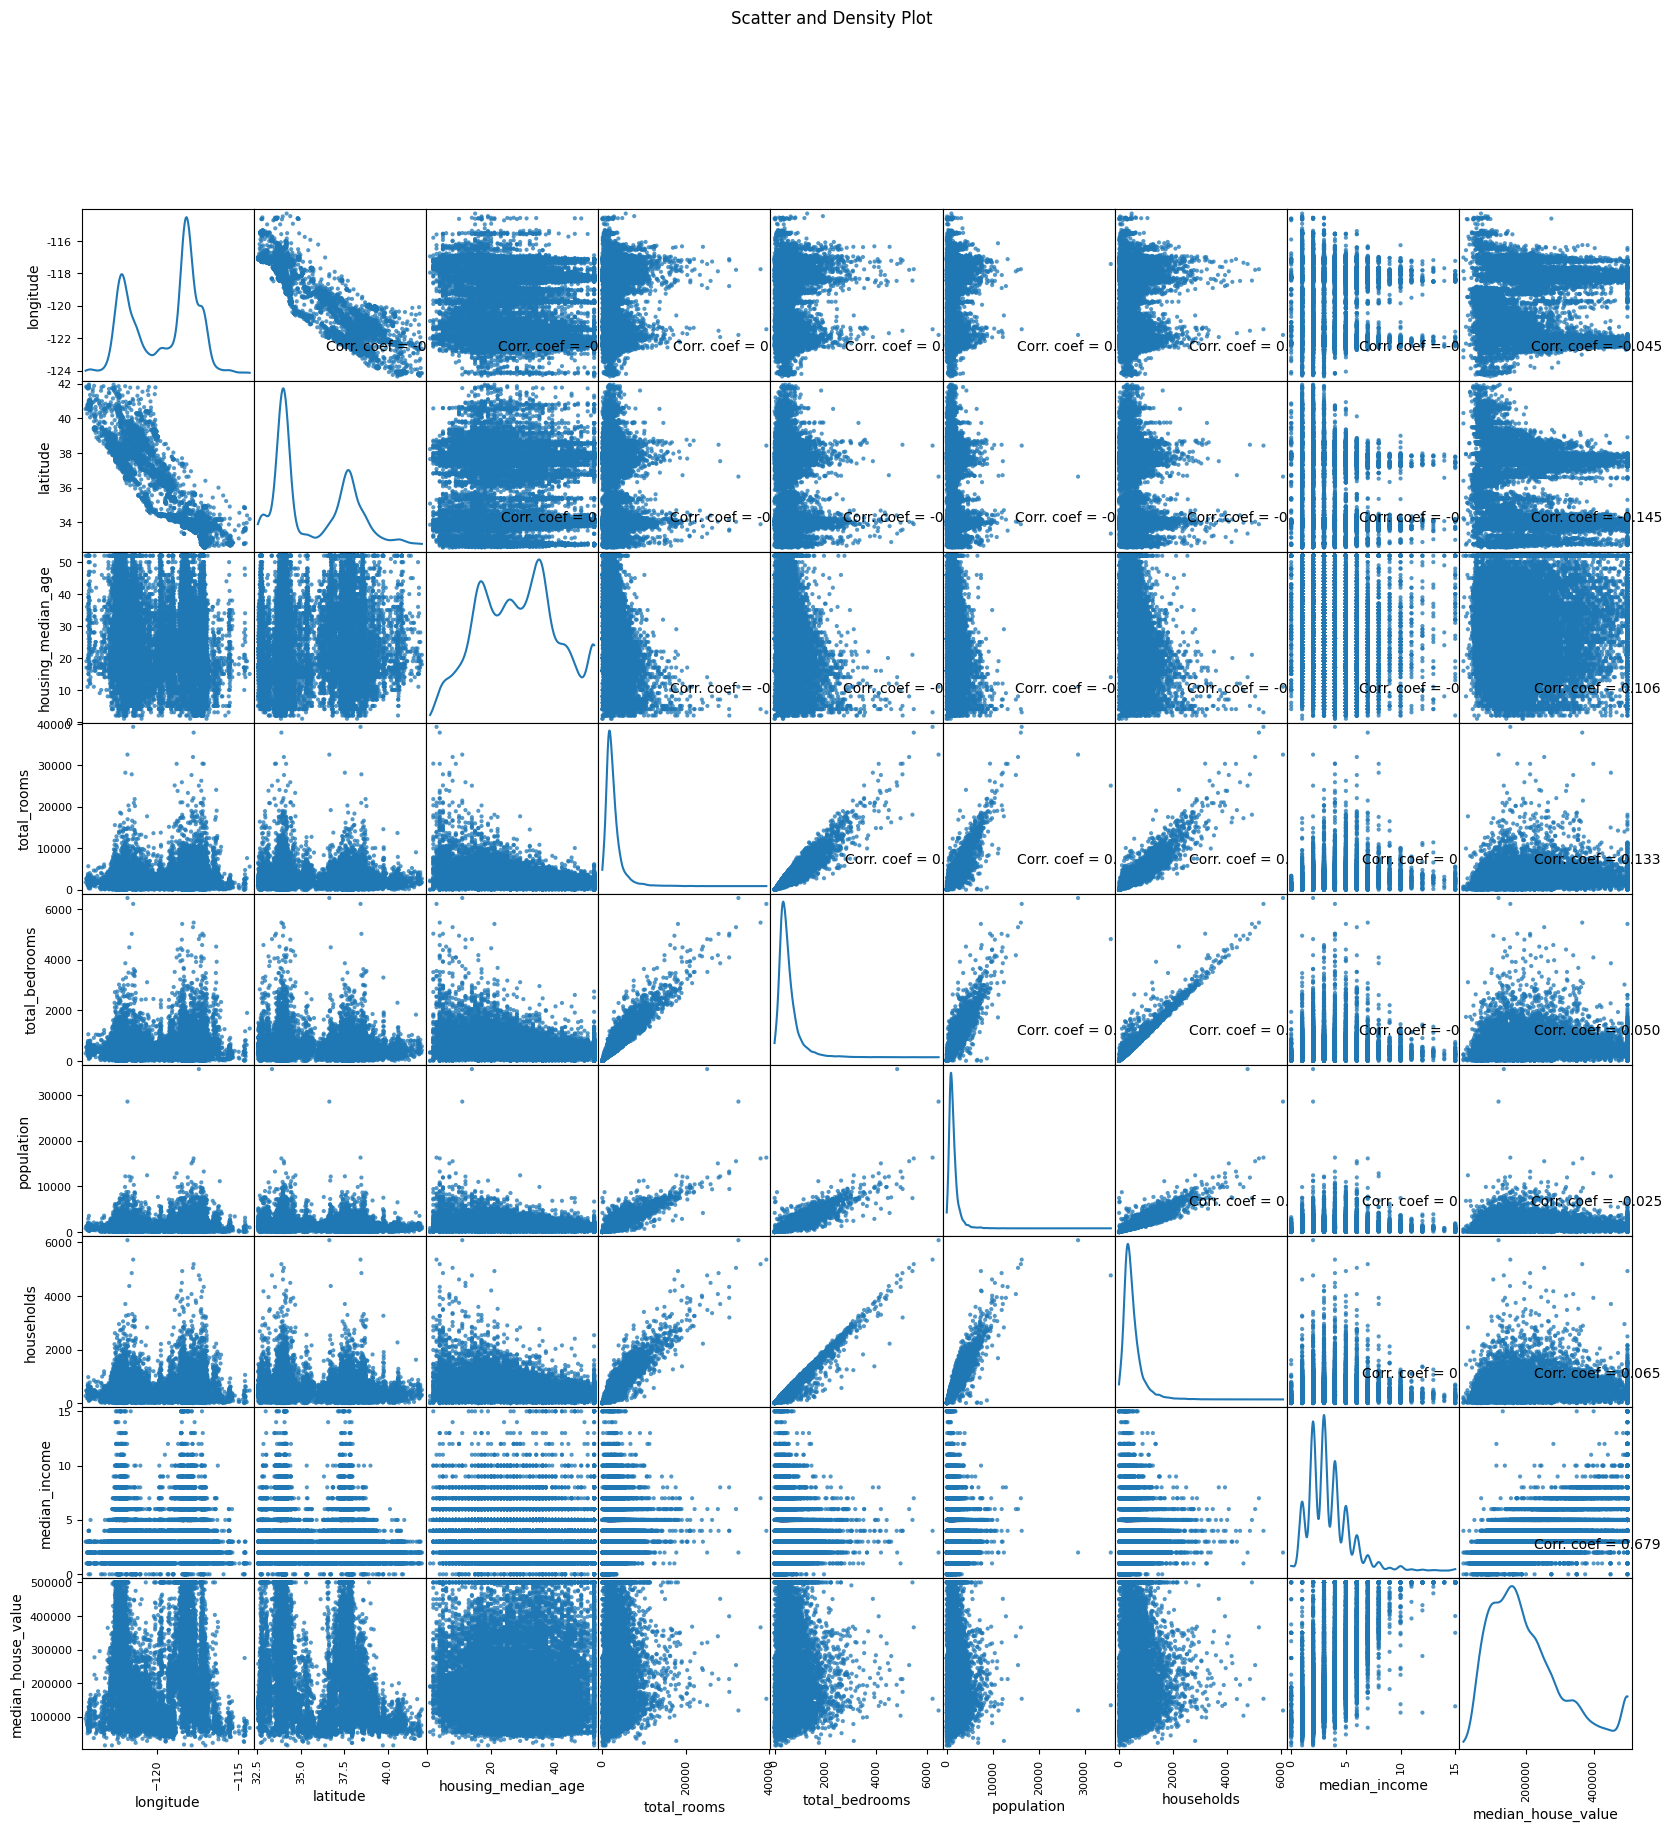

In [ ]:
plotScatterMatrix(df, 20, 10)

In [ ]:
plotScatterMatrix(df_menor_sin_outliers, 20, 10)


Text(0.5, 0, 'Proximidad al océano')

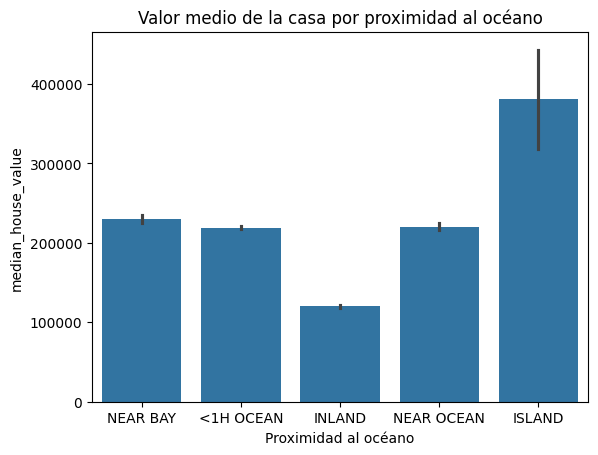

In [ ]:
sns.barplot(x='ocean_proximity', y='median_house_value', data=df_menor_sin_outliers)
plt.title('Valor medio de la casa por proximidad al océano')
plt.xlabel('Proximidad al océano')


array([[<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>],
       [<Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >]], dtype=object)

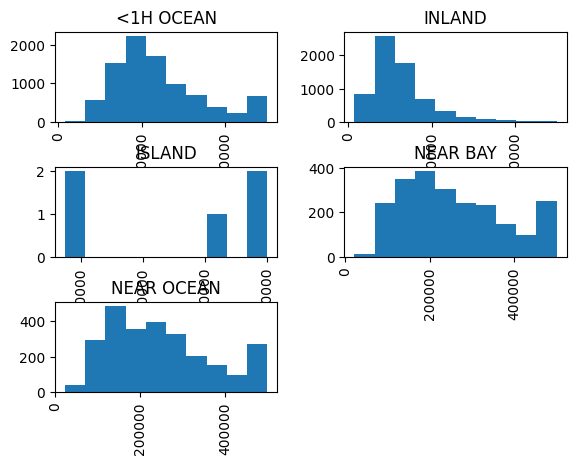

In [ ]:
df.hist("median_house_value", by=("ocean_proximity"))

In [ ]:
frecuencia_proximidad = df["ocean_proximity"].value_counts(normalize= True)
frecuencia_proximidad

ocean_proximity
<1H OCEAN     0.442128
INLAND        0.317917
NEAR OCEAN    0.128615
NEAR BAY      0.111095
ISLAND        0.000245
Name: proportion, dtype: float64

#1. NEAR BAY - CERCA DE LA BAHÍA
2. <1H OCEAN - A MENOS DE 1 HORA DEL OCÉANO
3. INLAND - INTERIOR
4. NEAR OCEAN - CERCA DEL OCÉANO
5. ISLAND - ISLA


([0, 1, 2, 3, 4],
 [Text(0, 0, 'NEAR BAY'),
  Text(1, 0, '<1H OCEAN'),
  Text(2, 0, 'INLAND'),
  Text(3, 0, 'NEAR OCEAN'),
  Text(4, 0, 'ISLAND')])

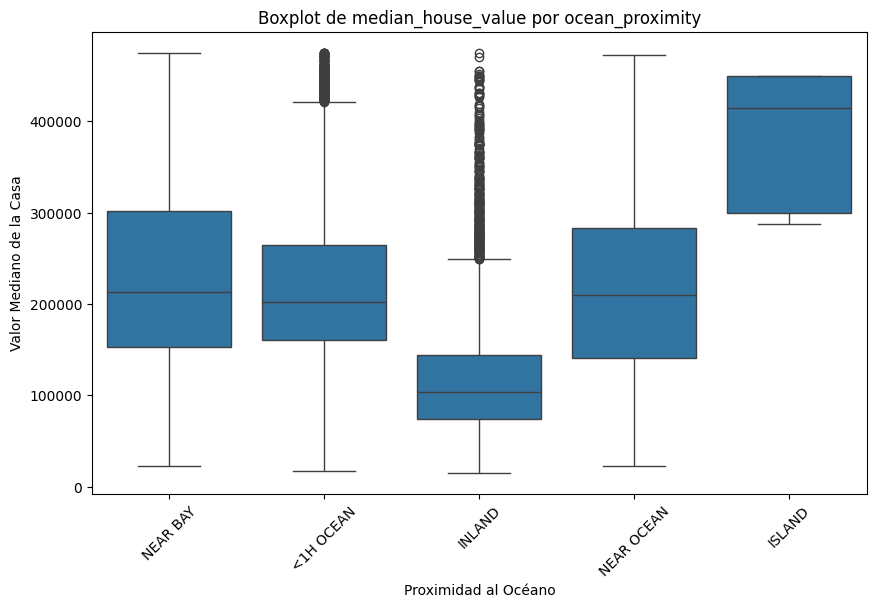

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df_menor_sin_outliers)
plt.title('Boxplot de median_house_value por ocean_proximity')
plt.xlabel('Proximidad al Océano')
plt.ylabel('Valor Mediano de la Casa')
plt.xticks(rotation=45)

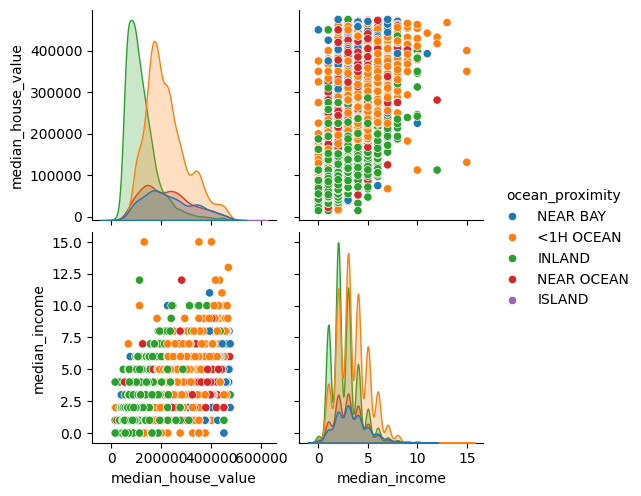

In [ ]:
sns.pairplot(df_menor_sin_outliers, hue='ocean_proximity', vars=['median_house_value', 'median_income'])
plt.show()


# Las posibles variables predictoras son median_income y ocean_proximity

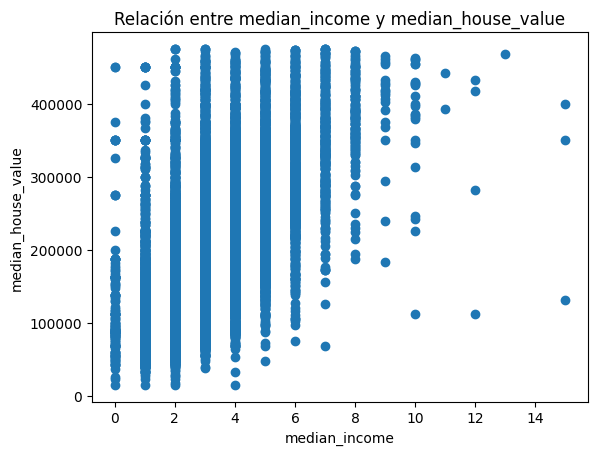

In [ ]:
plt.scatter(df_menor_sin_outliers['median_income'], df_menor_sin_outliers['median_house_value'])
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Relación entre median_income y median_house_value')
plt.show()

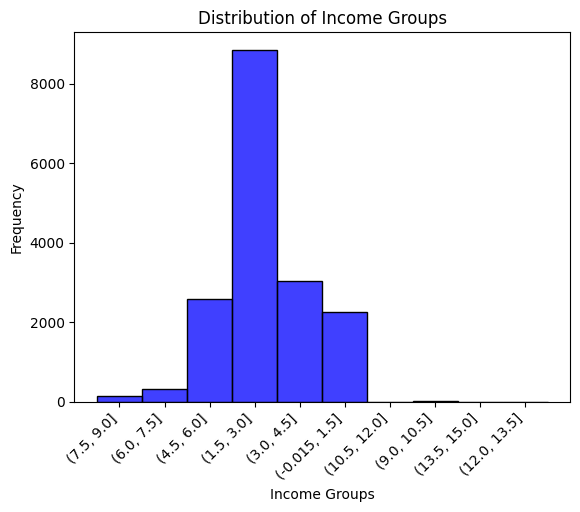

In [ ]:
df_menor_sin_outliers["income_groups"] = pd.cut(df_menor_sin_outliers["median_income"], bins=10)
# Convert the Interval categories to strings for plotting
# This allows seaborn to treat them as categorical data
income_groups_str = df_menor_sin_outliers["income_groups"].astype(str)

sns.histplot(income_groups_str, kde=False, color='blue')
# kde is set to False because it doesn't make sense for categorical data
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.title('Distribution of Income Groups')
plt.xlabel('Income Groups')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model



In [ ]:
x = df_menor_sin_outliers["median_income"].values.reshape(-1, 1)
y= df_menor_sin_outliers['median_house_value'].values.reshape(-1, 1)

regresion = linear_model.LinearRegression()
regresion.fit(x, y)

LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Hacer predicciones
y_pred = regresion.predict(X_test_scaled)


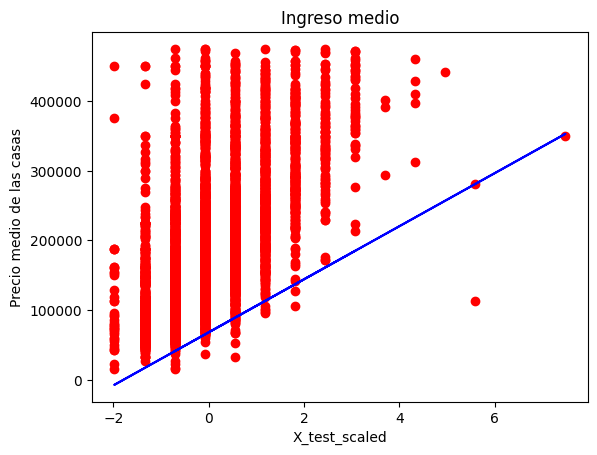

In [ ]:

# Graficar las predicciones contra los valores reales del conjunto de prueba
plt.scatter(X_test_scaled, y_test, color='red')  # Datos reales de prueba
plt.plot(X_test_scaled, y_pred, color='blue') # Predicciones en el conjunto de prueba
plt.title('Ingreso medio')
plt.xlabel('X_test_scaled')  # Cambiado a X_test_scaled
plt.ylabel('Precio medio de las casas')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")


Error Cuadrático Medio (MSE): 20425518926.144005
Coeficiente de Determinación (R²): -1.2502792852901448
